In [ ]:
""" installations """

In [ ]:
!pip install torch pytorch-lightning torchvision torchaudio
#!pip install cudatoolkit -c pytorch

In [ ]:
!pip install pytorch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0 cudatoolkit=11.3 -c pytorch

In [ ]:
!mim install 'mmcv>=2.0.0'

In [ ]:
""" use pytorch 1.12 and cuda 11.3, check nvcc version and gcc version """
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!git clone -b main https://github.com/open-mmlab/mmsegmentation.git

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15117, done.
remote: Counting objects: 100% (683/683), done.
remote: Compressing objects: 100% (464/464), done.
remote: Total 15117 (delta 271), reused 421 (delta 187), pack-reused 14434
Receiving objects: 100% (15117/15117), 20.70 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (10576/10576), done.


In [ ]:
%cd mmsegmentation/
!pip install -v -e .

/content/mmsegmentation
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-qatsdj5t/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICEN

In [ ]:
!df -k

Filesystem     1K-blocks     Used Available Use% Mounted on
overlay        174875372 25658352 149200636  15% /
tmpfs              65536        0     65536   0% /dev
shm             42730496        0  42730496   0% /dev/shm
/dev/root        2003760  1029112    974648  52% /usr/sbin/docker-init
tmpfs           43767960     1964  43765996   1% /var/colab
/dev/sda1      181407268 27773640 153617244  16% /opt/bin/.nvidia
tmpfs           43767960        0  43767960   0% /proc/acpi
tmpfs           43767960        0  43767960   0% /proc/scsi
tmpfs           43767960        0  43767960   0% /sys/firmware
drive          174875372 33134768 141740604  19% /content/drive


In [ ]:
path = f'/content/drive/MyDrive/A_Vesuvius/'
path

'/content/drive/MyDrive/A_Vesuvius/'

In [ ]:
"""
Paths to the data - images, labels, masks
stage_fragment_id - the string representing the framgment of images to load
z_start - starting point for the dimensions to load the scanned images
z_dim - the number of scans to load from the starting indicator z_start
"""

In [ ]:
train_path = f'{path}train/'
test_path = f'{path}test/'

train_fragment_ids = ['1'] #['1', '2', '3']
test_fragment_ids = ['a']  #['a', 'b']
z_start = 0
z_dim = 1
size = 512

train_path, test_path

('/content/drive/MyDrive/A_Vesuvius/train/',
 '/content/drive/MyDrive/A_Vesuvius/test/')

In [ ]:
import matplotlib.pyplot as plt
import PIL.Image as Image
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

import tqdm, glob

In [ ]:
# label.shape, mask.shape

((14830, 9506), (14830, 9506))

In [ ]:
images_path = f'{train_path}1/surface_volume/*.tif'
sorted(glob.glob(images_path)[z_start: z_start + z_dim])
for filename in \
            sorted(glob.glob(images_path))[z_start: z_start + z_dim]:
    print(filename)

In [ ]:
images_path = f'{train_path}1/surface_volume/*.tif'
images = [ np.array(Image.open(filename), dtype=np.float32)/65535.0 for filename in \
              sorted(glob.glob(images_path))[z_start: z_start + z_dim]]
images_path, len(images), images


In [ ]:
def load_surface_images(fragment_id, z_start, z_dim, train=True):
  if train:
    image_path = f'{train_path}{fragment_id}/surface_volume/*.tif'
  else:
    image_path = f'{test_path}{fragment_id}/surface_volume/*.tif'

  images = [ np.array(Image.open(filename), dtype=np.float32)/65535.0 for filename in \
              sorted(glob.glob(image_path))[z_start: z_start + z_dim]]
  return images

fragment_scans = {}
for fragment_id in ['1']: #'1', '2', '3']:
  fragment_scans[fragment_id] = load_surface_images(fragment_id, 0, 1, train=True)


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 <matplotlib.image.AxesImage at 0x7fe46878b1c0>)

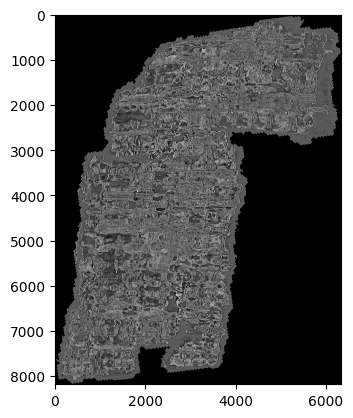

In [ ]:
fragment_scans['1'][7], plt.imshow(fragment_scans['1'][7], cmap = 'gray') # fragment_scans[fragment_id][scan_number]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 <matplotlib.image.AxesImage at 0x7f09d0073190>)

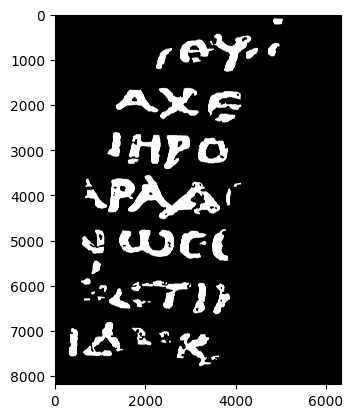

In [ ]:
fragment_labels = {}
for fragment_id in ['1']: #['1', '2', '3']:
  lfilename = f'{train_path}{fragment_id}/inklabels.png'
  fragment_labels[fragment_id] = np.array(
      Image.open(lfilename), dtype=np.float32)/65535.0
fragment_labels['1'], plt.imshow(fragment_labels['1'], cmap = 'gray')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 <matplotlib.image.AxesImage at 0x7f0a96dc0eb0>)

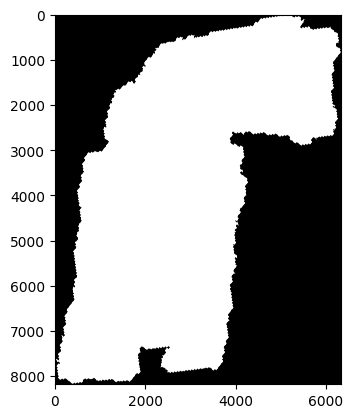

In [ ]:
fragment_masks = {}
for fragment_id in ['1']: #['1', '2', '3']:
  lfilename = f'{train_path}{fragment_id}/mask.png'
  fragment_masks[fragment_id] = np.array(
      Image.open(lfilename), dtype=np.float32)/65535.0

for fragment_id in ['a']: #['a', 'b']:
  lfilename = f'{test_path}{fragment_id}/mask.png'
  fragment_masks[fragment_id] = np.array(
      Image.open(lfilename), dtype=np.float32)/65535.0

fragment_masks['1'], plt.imshow(fragment_masks['1'], cmap = 'gray')

(7606, 5249)

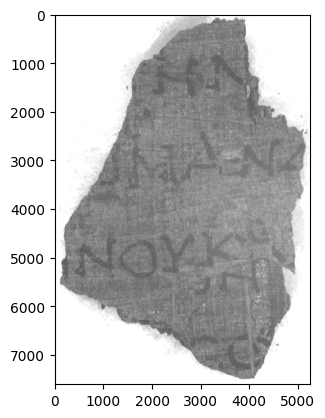

In [ ]:
full_image = np.array(Image.open(f'{train_path}3/ir.png'))
plt.imshow(full_image, cmap = 'gray')
full_image.shape

In [ ]:
full_image.shape

(7606, 5249)

In [ ]:
patch = (1200, 1700, 3750, 4000)

(20, 120)

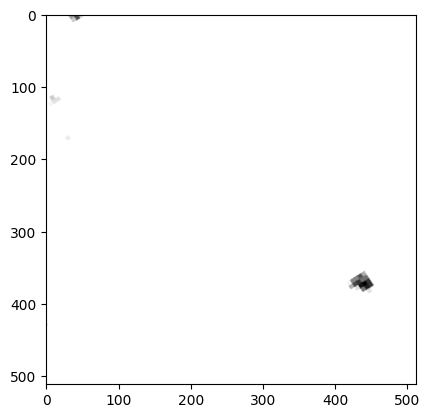

In [ ]:
x, y = full_image.shape[0], full_image.shape[1]
patch = (1200, 1700, 3750, 4000)
output_1 = []
output_2 = []
for i in range( x // size):
  for j in range( y // size):
    c_i1, c_i2, c_j1, c_j2 = [512*x for x in [i, i+1, j, j+1]]
    img = full_image[c_i1:c_i2, c_j1:c_j2]
    plt.imshow(img, cmap = 'gray')
    if img.sum() > 0:
      x_inside = (c_i2 > patch[0] and c_i2 < patch[1]) or \
                 (c_i1 < patch[1] and c_i1 > patch[0])
      y_inside = (c_j2 > patch[2] and c_j2 < patch[3]) or \
                 (c_j1 < patch[3] and c_j1 > patch[2])
      if x_inside or y_inside:
        output_1.append((i, j))
      else:
        output_2.append((i, j))

len(output_1), len(output_2)

In [ ]:
def get_indices(full_image, patch, size=size, train=True):
  x, y = full_image.shape[0], full_image.shape[1]
  if train:
    train_indices = []
    val_indices = []
    for i in range( x // size):
      for j in range( y // size):
        c_i1, c_i2, c_j1, c_j2 = [512*x for x in [i, i+1, j, j+1]]
        img = full_image[c_i1:c_i2, c_j1:c_j2]
        if img.sum() > 0:
          x_inside = (c_i2 > patch[0] and c_i2 < patch[1]) or \
                     (c_i1 < patch[1] and c_i1 > patch[0])
          y_inside = (c_j2 > patch[2] and c_j2 < patch[3]) or \
                     (c_j1 < patch[3] and c_j1 > patch[2])
          if x_inside or y_inside:
            train_indices.append((i, j))
          else:
            val_indices.append((i, j))

    return train_indices, val_indices

  else:
    test_indices = []
    for i in range( x // size):
      for j in range( y // size):
        c_i1, c_i2, c_j1, c_j2 = [512*x for x in [i, i+1, j, j+1]]
        if c_i2 > x:
          c_i1 = x - size
          c_i2 = c_i1 + size
        if c_j2 > y:
          c_j1 = y - size
          c_j2 = c_j1 + size
        img = full_image[c_i1:c_i2, c_j1:c_j2]
        if img.sum() > 0:
          test_indices.append((i, j))

    return test_indices

In [ ]:
"""
full image - numpy array of the mask os useful pixels for a particular fragment
size - desired input size for the model
baseline approach - for a given input size, reduce a full scan into
non-overlapping subscans of the desired size, discard extra pixels or anything
non useful (pixels)

return indices in the form (i, j) to be used to slice a full scan by taking
size*i:size*(i+1) and size*j:size*(j+1)

"""


(8181, 6330)

In [ ]:
!mim download mmsegmentation \
  --config swin-small-patch4-window7-in1k-pre_upernet_8xb2-160k_ade20k-512x512 --dest .

processing swin-small-patch4-window7-in1k-pre_upernet_8xb2-160k_ade20k-512x512...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.6/310.6 MiB 80.9 MB/s eta 0:00:00
Successfully downloaded upernet_swin_small_patch4_window7_512x512_160k_ade20k_pretrain_224x224_1K_20210526_192015-ee2fff1c.pth to /content/mmsegmentation
Successfully dumped swin-small-patch4-window7-in1k-pre_upernet_8xb2-160k_ade20k-512x512.py to /content/mmsegmentation


In [ ]:
from mmseg.structures import SegDataSample
from mmengine.structures import PixelData
from mmengine.registry import DATASETS, MODELS, METRICS
from mmengine.dist import is_main_process
from mmengine.evaluator import BaseMetric
from mmseg.evaluation.metrics.iou_metric import IoUMetric
from mmengine.runner import Runner

from mmengine.logging import MMLogger, print_log
from mmengine.utils import mkdir_or_exist
from prettytable import PrettyTable


In [ ]:
from mmengine import Config

config_file = "swin-small-patch4-window7-in1k-pre_upernet_8xb2-160k_ade20k-512x512.py"
cfg = Config.fromfile(config_file)
print(cfg.pretty_text)


norm_cfg = dict(type='SyncBN', requires_grad=True)
backbone_norm_cfg = dict(type='LN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained=None,
    backbone=dict(
        type='SwinTransformer',
        pretrain_img_size=224,
        embed_dims=96,
        patch_size=4,
        window_size=7,
        mlp_ratio=4,
        depths=[2, 2, 18, 2],
        num_heads=[3, 6, 12, 24],
        strides=(4, 2, 2, 2),
        out_indices=(0, 1, 2, 3),
        qkv_bias=True,
        qk_scale=None,
        patch_norm=True,
        drop_rate=0.

In [ ]:
from mmseg.structures import SegDataSample

In [ ]:
class Vesuvius_Dataset(data.Dataset):
  def __init__(self, fragment_ids, indices, z_start, z_dim, size=size, train=True):
    self.size = size
    self.image_indices = []
    self.labels = []
    self.train = train
    self.metadata = {'classes:': ['ink', 'no ink']}
    self.fragment_ids = fragment_ids

    for fragment_id in fragment_ids:
      for scan_number in range(len(fragment_scans[fragment_id])):
        self.image_indices.extend([x for x in indices])
      self.labels.extend([(fragment_id, x) for x in indices])

  def __len__(self):
    return len(self.image_indices)

  def __getitem__(self, index):
    if self.train:
      fragment_id, scan_number, (i, j) = self.image_indices[index]
    else:
      fragment_id, scan_number, (i, j) = index

    image = fragment_scans[fragment_id][scan_number]
    c_i1, c_i2, c_j1, c_j2 = [512*x for x in [i, i+1, j, j+1]]
    x, y = image.shape
    if c_i2 > x:
      c_i1 = x - size  ; c_i2 = c_i1 + size
    if c_j2 > y:
      c_j1 = y - size  ; c_j2 = c_j2 + size

    image = image[c_i1:c_i2, c_j1:c_j2]
    image = image.reshape(1, 512, 512)
    image = torch.tensor(image)

    if self.train:
      label = fragment_labels[fragment_id]
      label = label[512*i:512*(i+1), 512*j:512*(j+1)]
      label = label.reshape(1, 512, 512)

      image_metadata = dict(image_shape = (512, 512),
                            pad_shape = (1, 512, 512),
                            original_shape = (512, 512))
      segmentations = PixelData(metainfo=image_metadata)
      segmentations.data = torch.tensor(label)
      data_sample = SegDataSample(metainfo=image_metadata)
      data_sample.gt_sem_seg = segmentations

    if self.train:
      return image, data_sample

    return image


In [ ]:
fragment_labels['1']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
label_ = fragment_labels['1']
label_ = label_[1536:2048, 4608:5120]
label_.reshape(1, 512, 512)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [ ]:
fragment_masks['1']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
fragment_scans['1'][:2]

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [ ]:
image_ = fragment_scans['1'][2]
image_ = image_[1536:2048, 4608:5120]
image_.reshape(1, 512, 512)
image_

array([[0.5413291 , 0.525185  , 0.4814832 , ..., 0.3515221 , 0.3417563 ,
        0.32899976],
       [0.46652934, 0.4909285 , 0.45998323, ..., 0.33949798, 0.33026627,
        0.3229877 ],
       [0.43955138, 0.480354  , 0.5031968 , ..., 0.35953307, 0.35252917,
        0.34264132],
       ...,
       [0.25745022, 0.26387426, 0.27714962, ..., 0.44486153, 0.4511635 ,
        0.4306859 ],
       [0.33090714, 0.3262379 , 0.32483405, ..., 0.48337528, 0.5011368 ,
        0.4801404 ],
       [0.4240177 , 0.4231632 , 0.43414968, ..., 0.46826887, 0.4717632 ,
        0.45635158]], dtype=float32)

In [ ]:
patch = (1290, 1600, 3750, 4000)
len(get_indices(fragment_masks['1'], patch))

2

In [ ]:
train_fragment_indices, val_fragment_indices = get_indices(fragment_masks['1'], patch)

In [ ]:
train_indices, val_indices = [] , []
for fragment_id in ['1']: #['1', '2', '3']:
  train_fragment_indices, val_fragment_indices = \
                          get_indices(fragment_masks[fragment_id], patch)
  for scan_number in range(len(fragment_scans[fragment_id])):
    train_index = [[fragment_id, scan_number, x] for x in train_fragment_indices]
    if fragment_id =='1': print(train_index)
    train_indices.extend(train_index)
    val_index = [[fragment_id, scan_number, x] for x in val_fragment_indices]
    val_indices.extend(val_index)


[['1', 0, (2, 3)], ['1', 0, (2, 4)], ['1', 0, (2, 5)], ['1', 0, (2, 6)], ['1', 0, (2, 7)], ['1', 0, (2, 8)], ['1', 0, (2, 9)], ['1', 0, (2, 10)], ['1', 0, (2, 11)], ['1', 0, (3, 2)], ['1', 0, (3, 3)], ['1', 0, (3, 4)], ['1', 0, (3, 5)], ['1', 0, (3, 6)], ['1', 0, (3, 7)], ['1', 0, (3, 8)], ['1', 0, (3, 9)], ['1', 0, (3, 10)], ['1', 0, (3, 11)]]


In [ ]:
for fragment_id in ['a']: #[ 'a', 'b']:
  fragment_scans[fragment_id] = load_surface_images(fragment_id, 0, 10, train=False)


In [ ]:
get_indices(fragment_masks['b'], patch, train=False)

In [ ]:
fragment_scans['a'][:1]

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [ ]:
test_indices = []
for fragment_id in ['a']: #['a', 'b']:
  test_fragment_indices = \
                    get_indices(fragment_masks[fragment_id], patch, train=False)
  for scan_number in range(len(fragment_scans[fragment_id])):
    test_index = [[fragment_id, scan_number, x] for x in test_fragment_indices]
    if fragment_id =='a': print(test_index)
    test_indices.extend(train_index)


In [ ]:
imgs = [sample[0] for sample in [fragment_scans['1'], fragment_scans['2']]]
np.array(imgs)

<ipython-input-42-bf92bfebe5e9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(imgs)


array([array([[0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              ...,
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
       array([[0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              ...,
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.],
              [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)],
      dtype=object)

In [ ]:
arr_1 = np.array(fragment_scans['1'][0])
arr_2 = np.array(fragment_scans['1'][0])
# same dimension for concatenate, scolls are of different dimensions
np.stack((arr_1, arr_2), axis=0)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [ ]:
""" img_stack = torch.stack([torch.from_numpy(image_tensor)
                 for image_tensor in iage_list], dim=0) """
torch.stack([torch.from_numpy(fragment_scans['1'][0]),
             torch.from_numpy(fragment_scans['1'][1])], dim=0)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
def collate(data, train=True):
  images = torch.stack([item[0] for item in data ])
  if train:
    samples = [item[1] for item in data]
    ds = {'inputs': images, 'data_samples': samples}
  else:
    number, height, width = images.shape
    return images.view(number, 1, height, width )
  return ds

In [ ]:
fragment_scans['1'][0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
len(fragment_scans['1'])

10

In [ ]:
fragment_ids = ['1'] #['1', '2', '3']
train_dataset = Vesuvius_Dataset(fragment_ids, train_indices, z_start, z_dim,
                                 train=True)
val_dataset = Vesuvius_Dataset(fragment_ids, val_indices, z_start, z_dim,
                               train=True)
train_dataset, val_dataset

(<__main__.Vesuvius_Dataset at 0x7f099aa94fa0>,
 <__main__.Vesuvius_Dataset at 0x7f0a95a15b10>)

In [ ]:
fragment_ids = ['a'] #['a', 'b']
test_dataset = Vesuvius_Dataset(fragment_ids, test_indices, z_start, z_dim,
                                train=False)
test_dataset

In [ ]:
train_dataloader = data.DataLoader(train_dataset, batch_size=64, shuffle=True,
                                   #num_workers=0,
                                   collate_fn=collate)
val_dataloader = data.DataLoader(val_dataset, batch_size=64, shuffle=True,
                                   #num_workers=0,
                                   collate_fn=collate)

In [ ]:
next(iter(val_dataloader))

{'inputs': tensor([[[[0.4536, 0.4714, 0.4886,  ..., 0.3299, 0.3019, 0.2763],
           [0.4759, 0.4910, 0.4876,  ..., 0.2686, 0.2540, 0.2410],
           [0.4979, 0.5067, 0.4977,  ..., 0.2175, 0.2259, 0.2392],
           ...,
           [0.2757, 0.3361, 0.3710,  ..., 0.3872, 0.3286, 0.2987],
           [0.2958, 0.3392, 0.3530,  ..., 0.3707, 0.3446, 0.3414],
           [0.3517, 0.3811, 0.3822,  ..., 0.3994, 0.3894, 0.4020]]],
 
 
         [[[0.3648, 0.3683, 0.3669,  ..., 0.4394, 0.4623, 0.4771],
           [0.3449, 0.3501, 0.3554,  ..., 0.4512, 0.4842, 0.5023],
           [0.3563, 0.3489, 0.3429,  ..., 0.4335, 0.4730, 0.5090],
           ...,
           [0.3415, 0.3861, 0.4124,  ..., 0.2010, 0.1917, 0.1815],
           [0.3879, 0.4067, 0.4249,  ..., 0.2138, 0.2109, 0.1964],
           [0.3982, 0.3916, 0.3853,  ..., 0.2797, 0.2744, 0.2616]]],
 
 
         [[[0.5968, 0.5918, 0.5746,  ..., 0.2603, 0.2574, 0.2543],
           [0.5588, 0.5582, 0.5612,  ..., 0.2507, 0.2515, 0.2578],
        

In [ ]:
iter(train_dataloader)

(torch.Size([4, 512, 512]), torch.Size([4, 512, 512]))

<Figure size 1100x1100 with 0 Axes>

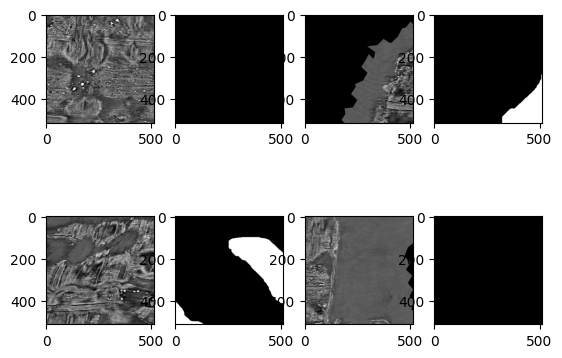

In [ ]:
samples_ = next(iter(train_dataloader))
images_ = samples_['inputs']
labels_ = torch.stack( [samples_['data_samples'][i].gt_sem_seg.data
                       for i in range(4) ] )
images_, labels_ = images_[:4].view(4, 512, 512), labels_[:4].view(4, 512, 512)
plt.figure(figsize=(10, 10), dpi=110)
fig, ax = plt.subplots(2, 4)
for i, (image, label) in enumerate(zip(images_, labels_)):
  if i < 2:
    ax[0][2*i].imshow(image, cmap='gray')
    ax[0][2*i+1].imshow(label, cmap='gray')
  else:
    i -= 2
    ax[1][2*i].imshow(image, cmap='gray')
    ax[1][2*i+1].imshow(label, cmap='gray')
images_.shape, labels_.shape

In [ ]:
""" Data Preprocessor and Seg-Data-Preprocessor """

from mmengine.model import BaseDataPreprocessor

from mmseg.registry import MODELS
from mmseg.utils import stack_batch

In [ ]:
from mmseg.apis import init_model, show_result_pyplot
import mmcv

model = init_model(cfg, device=device)
model.data_preprocessor._enable_normalize = False


06/16 01:07:14 - mmengine - WARNING - The current default scope "mmengine" is not "mmseg", `init_default_scope` will force set the currentdefault scope to "mmseg".


/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:136: UserWarning: threshold is not defined for binary, and defaultsto 0.3
  warnings.warn('threshold is not defined for binary, and defaults'
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


In [ ]:
cfg.model.backbone.in_channels = 1
cfg.model.decode_head.num_classes = 2
cfg.model.auxiliary_head.num_classes = 2
cfg.model.decode_head.out_channels = 1
cfg.model.decode_head.loss_decode.use_sigmoid = True
cfg.model.auxiliary_head.out_channels = 1
cfg.model.auxiliary_head.loss_decode.use_sigmoid = True
"""
if device = 'cpu':
    cfg.model.decode_head.norm_cfg.type = 'BN'
    cfg.model.auxiliary_head.norm_cfg.type = 'BN'
    cfg.norm_cfg.type='BN'
"""
cfg['train_cfg']['val_interval'] = 1200
cfg['train_cfg']['max_iters'] = 1200
cfg['val_cfg'] = {'type': 'ValLoop'}
cfg['val_evaluator'] = dict(type='FBetaScore')

cfg

Config (path: swin-small-patch4-window7-in1k-pre_upernet_8xb2-160k_ade20k-512x512.py): {'norm_cfg': {'type': 'BN', 'requires_grad': True}, 'backbone_norm_cfg': {'type': 'LN', 'requires_grad': True}, 'data_preprocessor': {'type': 'SegDataPreProcessor', 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'bgr_to_rgb': True, 'pad_val': 0, 'seg_pad_val': 255, 'size': (512, 512)}, 'model': {'type': 'EncoderDecoder', 'data_preprocessor': {'type': 'SegDataPreProcessor', 'mean': [123.675, 116.28, 103.53], 'std': [58.395, 57.12, 57.375], 'bgr_to_rgb': True, 'pad_val': 0, 'seg_pad_val': 255, 'size': (512, 512)}, 'pretrained': None, 'backbone': {'type': 'SwinTransformer', 'pretrain_img_size': 224, 'embed_dims': 96, 'patch_size': 4, 'window_size': 7, 'mlp_ratio': 4, 'depths': [2, 2, 18, 2], 'num_heads': [3, 6, 12, 24], 'strides': (4, 2, 2, 2), 'out_indices': (0, 1, 2, 3), 'qkv_bias': True, 'qk_scale': None, 'patch_norm': True, 'drop_rate': 0.0, 'attn_drop_rate': 0.0, 'drop_path_rate

In [ ]:
default_hooks = dict(
    timer = dict(type='IterTimerHook'),
    logger = dict(type='LoggerHook', interval=1, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint = dict(type='CheckpointHook', by_epoch=False, interval=16000)
)

In [ ]:
from typing import Sequence, Dict, List, Any, Optional
from numbers import Number
#@MODELS.register_module()
class SegDataPreProcessor(BaseDataPreprocessor):
    """Image pre-processor for segmentation tasks.

    Comparing with the :class:`mmengine.ImgDataPreprocessor`,

    1. It won't do normalization if ``mean`` is not specified.
    2. It does normalization and color space conversion after stacking batch.
    3. It supports batch augmentations like mixup and cutmix.

    It provides the data pre-processing as follows

    - Collate and move data to the target device.
    - Pad inputs to the input size with defined ``pad_val``, and pad seg map
        with defined ``seg_pad_val``.
    - Stack inputs to batch_inputs.
    - Convert inputs from bgr to rgb if the shape of input is (3, H, W).
    - Normalize image with defined std and mean.
    - Do batch augmentations like Mixup and Cutmix during training.
    """

    def __init__(
        self,
        mean: Sequence[Number] = None,
        std: Sequence[Number] = None,
        size: Optional[tuple] = None,
        size_divisor: Optional[int] = None,
        pad_val: Number = 0,
        seg_pad_val: Number = 255,
        bgr_to_rgb: bool = False,
        rgb_to_bgr: bool = False,
        batch_augments: Optional[List[dict]] = None,
        test_cfg: dict = None,
    ):
        super().__init__()
        self.size = size
        self.size_divisor = size_divisor
        self.pad_val = pad_val
        self.seg_pad_val = seg_pad_val

        assert not (bgr_to_rgb and rgb_to_bgr), (
            '`bgr2rgb` and `rgb2bgr` cannot be set to True at the same time')
        self.channel_conversion = rgb_to_bgr or bgr_to_rgb

        if mean is not None:
            assert std is not None, 'To enable the normalization in ' \
                                    'preprocessing, please specify both ' \
                                    '`mean` and `std`.'
            # Enable the normalization in preprocessing.
            self._enable_normalize = True
            self.register_buffer('mean',
                                 torch.tensor(mean).view(-1, 1, 1), False)
            self.register_buffer('std',
                                 torch.tensor(std).view(-1, 1, 1), False)
        else:
            self._enable_normalize = False

        # TODO: support batch augmentations.
        self.batch_augments = batch_augments

        # Support different padding methods in testing
        self.test_cfg = test_cfg

    def forward(self, data: dict, training: bool = False) -> Dict[str, Any]:
        """Perform normalization、padding and bgr2rgb conversion based on
        ``BaseDataPreprocessor``.

        Args:
            data (dict): data sampled from dataloader.
            training (bool): Whether to enable training time augmentation.

        Returns:
            Dict: Data in the same format as the model input.
        """
        data = self.cast_data(data)  # type: ignore
        inputs = data['inputs']
        data_samples = data.get('data_samples', None)
        # TODO: whether normalize should be after stack_batch
        if self.channel_conversion and inputs[0].size(0) == 3:
            inputs = [_input[[2, 1, 0], ...] for _input in inputs]

        inputs = [_input.float() for _input in inputs]
        if self._enable_normalize:
            inputs = [(_input - self.mean) / self.std for _input in inputs]

        if training:
            assert data_samples is not None, ('During training, ',
                                              '`data_samples` must be define.')
            inputs, data_samples = stack_batch(
                inputs=inputs,
                data_samples=data_samples,
                size=self.size,
                size_divisor=self.size_divisor,
                pad_val=self.pad_val,
                seg_pad_val=self.seg_pad_val)

            if self.batch_augments is not None:
                inputs, data_samples = self.batch_augments(
                    inputs, data_samples)
        else:
            assert len(inputs) == 1, (
                'Batch inference is not support currently, '
                'as the image size might be different in a batch')
            # pad images when testing
            if self.test_cfg:
                inputs, padded_samples = stack_batch(
                    inputs=inputs,
                    size=self.test_cfg.get('size', None),
                    size_divisor=self.test_cfg.get('size_divisor', None),
                    pad_val=self.pad_val,
                    seg_pad_val=self.seg_pad_val)
                for data_sample, pad_info in zip(data_samples, padded_samples):
                    data_sample.set_metainfo({**pad_info})
            else:
                inputs = torch.stack(inputs, dim=0)

        return dict(inputs=inputs, data_samples=data_samples)



In [ ]:
@MODELS.register_module()
class VDataPreProcessor(SegDataPreProcessor):
  def __init__(self, size):
    super().__init__(size=size)

  def forward(self, data, training):
    data = self.cast_data(data)
    inputs = data['inputs']
    data_samples = data.get('data_samples', None)

    # TODO: whether normalize should be after stack_batch
    if self.channel_conversion and inputs[0].size(0) == 3:
      inputs = [_input[[2, 1, 0], ...] for _input in inputs]

    inputs = [_input.float() for _input in inputs]
    if self._enable_normalize:
      inputs = [(_input - self.mean) / self.std for _input in inputs]

    if training:
            assert data_samples is not None, ('During training, ',
                                              '`data_samples` must be define.')
            inputs, data_samples = stack_batch(
                inputs=inputs,
                data_samples=data_samples,
                size=self.size,
                size_divisor=self.size_divisor,
                pad_val=self.pad_val,
                seg_pad_val=self.seg_pad_val)

            if self.batch_augments is not None:
                inputs, data_samples = self.batch_augments(
                    inputs, data_samples)
    else:

            # pad images when testing
            if self.test_cfg:
                inputs, padded_samples = stack_batch(
                    inputs=inputs,
                    size=self.test_cfg.get('size', None),
                    size_divisor=self.test_cfg.get('size_divisor', None),
                    pad_val=self.pad_val,
                    seg_pad_val=self.seg_pad_val)
                for data_sample, pad_info in zip(data_samples, padded_samples):
                    data_sample.set_metainfo({**pad_info})
            else:
                inputs = torch.stack(inputs, dim=0)

    return dict(inputs=inputs, data_samples=data_samples)


In [ ]:
@METRICS.register_module()
class FBetaScore(BaseMetric):
  def __init__(self):
    super().__init__()

  def process(self, data_batch, data_samples):
    for data_sample in data_samples:
      pred_label = data_sample['pred_sem_seg']['data'].squeeze()
      label = data_sample['gt_sem_seg']['data'].squeeze()
      self.results.append(self.calculate_fbetascore(pred_label, label))

  def compute_metrics(self, results):
    beta = 0.5
    results = tuple(zip(*results))
    true_pos, false_pos, false_neg = sum(results[0]), sum(results[1]), sum(results[2])
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    score = ((1 + beta**2)*precision*recall) / ((beta**2)*precision + recall)
    metrics = {'FbetaScore': score}

    return metrics

  def calculate_fbetascore(self, pred_label, label):
    pred_label, label = pred_label.view(512*512), label(512*512)
    true_pos = ((pred_label==1)*(label==1)).sum()
    false_pos = ((pred_label==1)*(label==0)).sum()
    false_neg = ((pred_label==0)*(label==1)).sum()

    return true_pos, false_pos, false_neg

In [ ]:
model.data_preprocessor = VDataPreProcessor(size=(512, 512))

In [ ]:
cfg['optim_wrapper']

"""
optim_wrapper=dict(type='OptimizerWrapper', optimizer=dict(type='SGD', lr=0.01))
"""

" \noptim_wrapper=dict(type='OptimizerWrapper', optimizer=dict(type='SGD', lr=0.01))\n"

In [ ]:
device

device(type='cuda')

In [ ]:
runner = Runner(model,
                work_dir = path,

                train_dataloader = train_dataloader,
                train_cfg = cfg['train_cfg'],

                val_dataloader = val_dataloader,
                val_cfg = cfg['val_cfg'],
                val_evaluator = cfg['val_evaluator'],

                optim_wrapper = cfg['optim_wrapper'],
                default_hooks = default_hooks)

06/16 02:54:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 29161784
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch

In [ ]:
model = runner.train()

In [ ]:
""" use this template to replicate for other models """

In [ ]:
def run_length_encoding_2(x):
  flatten_image  = x.flatten('C')
  flatten_image = np.where(flatten_image > 0.5, 1, 0).astype(np.uint8)
  start_edge = np.array((flatten_image[:-1] ==0) and (flatten_image[1:] ==1))
  start_edge = np.append(np.array((flatten_image[0] ==1)), start_edge)
  end_edge = np.array((flatten_image[:-1] ==1) and (flatten_image[1:] ==0))
  end_edge = np.append(np.array((flatten_image[-1] ==1)), start_edge)
  start_edge_ix = np.where(start_edge)[0] + 1
  end_edge_ix = np.where(end_edge)[0] + 1
  lengths = end_edge_ix - start_edge_ix + 1
  encoded = ''
  for start_, len_ in zip(start_edge_ix, lengths): encoded += f'{start_}{len_}'
  encoded.strip()
  return encoded

In [ ]:
""" rle from the team """
def rle(img):
  pixels = img.flatten()
  pixels = np.concatenate([[0], pixels, [0]])
  runs = np.where(pixels[1:] != pixels[:-1])[0] +1
  runs[1::2] -= runs[::2]
  return ' '.join(str(x) for x in runs)

In [ ]:
z_dim

1

In [ ]:
fragment_predictions = {}
for fragment_id in fragment_ids:
  fragment_predictions[fragment_id] = np.zeros(
      shape=fragment_scans[fragment_id][0].shape).astype('uint8')
  x, y = fragment_scans[fragment_id][0].shape
  print(x, y)
  # tiles with patch/crop size 512x512
  for i in range((x // size) +1):
    for j in range((y // size) +1):
      coord_i1, coord_i2, coord_j1, coord_j2 = [512*x for x in [i, i+1, j, j+1]]
      if coord_i2 > x:
        coord_i1 = x - size
        coord_i2 = coord_i1 + size
      if coord_j2 > y:
        coord_j1 = y - size
        coord_j2 = coord_j1 + size
      predictions_ = np.zeros(shape=(512, 512))
      for fragment_scan in range(z_dim):
        image_ = test_dataset.__getitem__([fragment_id, fragment_scan, (i, j)])
        logits = model(image_.view(1, 1, 512, 512).to(device), mode='predict')[0]
        #print(logits)
        logits = logits.seg_logits.data.view(512, 512).detach().cpu().numpy()
        predictions_ += logits / z_dim
        print(predictions_)
      fragment_predictions[fragment_id][coord_i1:coord_i2, coord_j1:coord_j2] = \
          (predictions_ > 0.01).astype('uint8')
      print(fragment_predictions[fragment_id].sum())

2727 6330
[[0.00293739 0.00293739 0.00314263 ... 0.00468648 0.00434531 0.00434531]
 [0.00293739 0.00293739 0.00314263 ... 0.00468648 0.00434531 0.00434531]
 [0.00325844 0.00325844 0.00348495 ... 0.00485894 0.00450959 0.00450959]
 ...
 [0.00390229 0.00390229 0.00412919 ... 0.00536504 0.00529289 0.00529289]
 [0.00371132 0.00371132 0.00394068 ... 0.00515616 0.0050741  0.0050741 ]
 [0.00371132 0.00371132 0.00394068 ... 0.00515616 0.0050741  0.0050741 ]]
3
[[0.00293739 0.00293739 0.00314263 ... 0.00468648 0.00434531 0.00434531]
 [0.00293739 0.00293739 0.00314263 ... 0.00468648 0.00434531 0.00434531]
 [0.00325844 0.00325844 0.00348495 ... 0.00485894 0.00450959 0.00450959]
 ...
 [0.00390229 0.00390229 0.00412919 ... 0.00536504 0.00529289 0.00529289]
 [0.00371132 0.00371132 0.00394068 ... 0.00515616 0.0050741  0.0050741 ]
 [0.00371132 0.00371132 0.00394068 ... 0.00515616 0.0050741  0.0050741 ]]
6
[[0.00293739 0.00293739 0.00314263 ... 0.00468648 0.00434531 0.00434531]
 [0.00293739 0.00293739 0

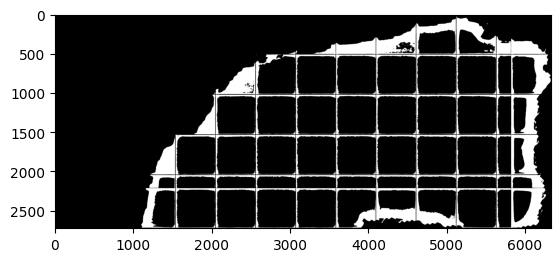

In [ ]:
plt.imshow(fragment_predictions['a'], cmap = 'gray')

In [ ]:
#plt.imshow(fragment_predictions['b'], cmap = 'gray')

In [ ]:
#submission = defaultdict(list)